# Rad Lab

M4011 (90 mm) Geiger-Müller tube simulations

© 2025 by Gissio

## Settings

In [2]:
detector_geometry = "data/geometry.toml"
detector_label = "M4011 (90 mm)"
N_montecarlo = 10000000

## Detector geometry

![J305 Geometry](data/geometry.png)

## Simulations

In [3]:
import sys
if '../../tools' not in sys.path:
    sys.path.append('../../tools')

import radlab

# %matplotlib widget

source_area = radlab.get_source_area(detector_geometry)
energies, efficiencies = radlab.simulate_gm_energies(
    detector_geometry, N_montecarlo)
angles, angular_response = radlab.simulate_gm_angles(
    detector_geometry, N_montecarlo)

## Detector efficiency

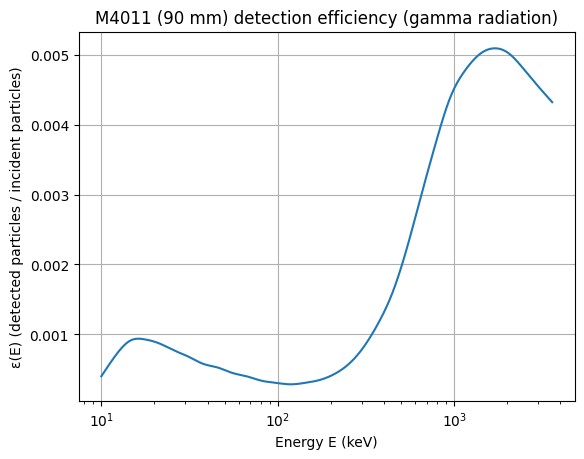

In [4]:
radlab.plot_semilogx(f'{detector_label} detection efficiency (gamma radiation)',
                     energies, efficiencies, "ε(E) (detected particles / incident particles)")

## Absorbed dose (air) sensitivity

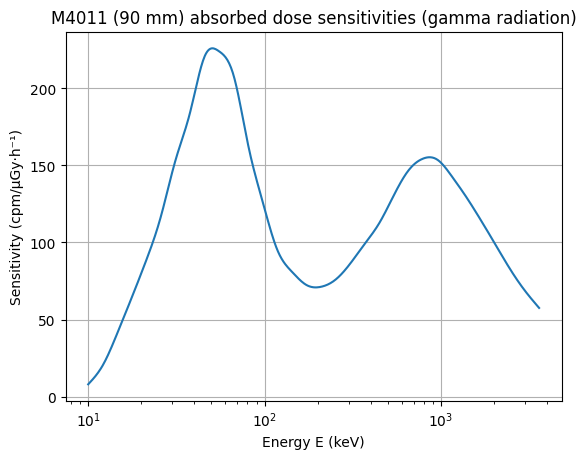

In [5]:
absorbed_dose_sensitivities = radlab.calculate_absorbed_dose_sensitivities(
    energies, efficiencies, source_area)

radlab.plot_semilogx(f'{detector_label} absorbed dose sensitivities (gamma radiation)',
                     energies, absorbed_dose_sensitivities, "Sensitivity (cpm/µGy·h⁻¹)")

## Effective dose sensitivity

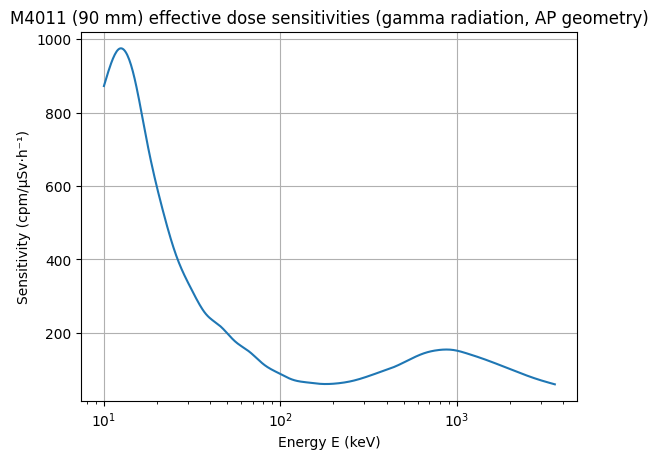

In [6]:
effective_dose_sensitivities = radlab.calculate_effective_dose_sensitivities(
    energies, efficiencies, source_area)

radlab.plot_semilogx(f'{detector_label} effective dose sensitivities (gamma radiation, AP geometry)',
                     energies, effective_dose_sensitivities, "Sensitivity (cpm/µSv·h⁻¹)")

## Angular response

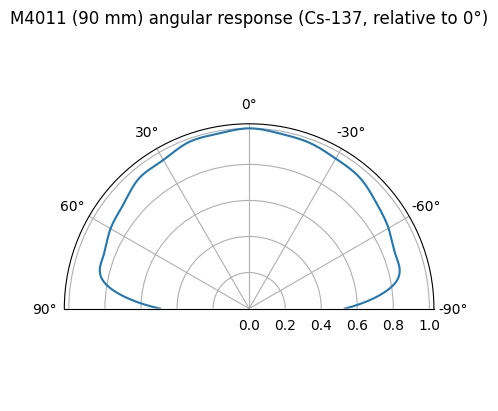

In [7]:
radlab.plot_polar(
    f'{detector_label} angular response (Cs-137, relative to 0°)', angles, angular_response)

## Sensitivity for various sources

In [8]:
source_sensitivities = radlab.calculate_source_sensitivities(
    energies, effective_dose_sensitivities)

radlab.print_source_sensitivities(source_sensitivities)

| Source | Sensitivity (cpm/µSv/h) | Relative sensitivity (Cs-137) |
|-|-|-|
| Cs-137 | 144.699 | 1.000 |
| Co-60 | 137.077 | 0.947 |
| I-131 | 93.941 | 0.649 |
| K-40 | 126.118 | 0.872 |
| Am-241 | 170.566 | 1.179 |
| Radium | 108.574 | 0.750 |
| Uranium ore | 108.121 | 0.747 |
| Uranium glaze | 108.473 | 0.750 |
| Depleted uranium | 109.319 | 0.755 |
| Thorium ore | 98.307 | 0.679 |
| X-ray tube (60 kV) | 258.985 | 1.790 |
| Natural background | 143.616 | 0.993 |
